In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [18]:


distance_matrices = [] # cdist funciton creates matrices so can use this to our advantage 

df = pd.read_csv('/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV/agarose-day4-n10/v025.2023-11-06_day4_n=10_13x.analysis.csv')

# Determine the maximum number of tracks in any frame
max_tracks = df['track'].nunique()

# Initialize a list to hold the distance matrices
distance_matrices = []

for frame in df['frame_idx'].unique():
            
    unique_frame = df[df['frame_idx'] == frame] # filter to ensure the frame is unique 
    
            # cdist function requires two 2-dimensional array-like objects as inputs
            # create an array of the coordinates for that specific frame

    body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

    # Create a matrix of NaNs with dimensions max_tracks x max_tracks
    track_matrix = np.full((max_tracks, max_tracks), np.nan)

            # The cdist function computes the distance between every pair of points in the two arrays passed to it.

    distance_matrix = cdist(body_coordinates, body_coordinates, 'euclidean')

            # the cdist function will also calculate the distance between the same tracks e.g. track 1 to track 1 
            # there will be 0s which should be exluded 
            # dont want to just ignore the 0s incase an animal is on top of one another 
            # the cdist function calculates the distances between tracks in a matrix fashion 
            # so can ignore the diagonal values which would refer distance between identical tracks 

    # np.fill_diagonal(distance_matrix, np.nan)

            # average_distance = np.nanmean(distance)


            # store frame id and average distance values in two lists 
            # if used a dictionary as before appending the same frame from a new file overides the previous value
    
    # this has to be here because of matrices stuff 

    track_matrix[:distance_matrix.shape[0], :distance_matrix.shape[1]] = distance_matrix

            
    distance_matrices.append(track_matrix)




# Calculate the element-wise mean of the matrices
mean_distance_matrix = np.nanmean(distance_matrices, axis=0)

# Apply conversion factor if necessary
pixel_to_cm = 9 / 1040
mean_distance_matrix *= pixel_to_cm

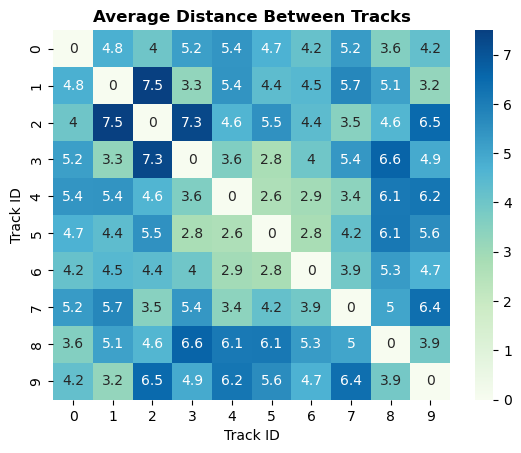

In [39]:
sns.heatmap(mean_distance_matrix, cmap='GnBu', annot=True)

plt.title('Average Distance Between Tracks', fontweight='bold')
plt.xlabel('Track ID')
plt.ylabel('Track ID')
plt.show()

In [53]:

def calculate_and_plot_heatmap(csv_filepath):
    # Read the CSV file into a DataFrame
    
    df = pd.read_csv(csv_filepath)

    # Determine the maximum number of tracks in any frame
    max_tracks = df['track'].nunique()

    # Initialize a list to hold the distance matrices
    distance_matrices = []

    for frame in df['frame_idx'].unique():
        unique_frame = df[df['frame_idx'] == frame]
        body_coordinates = unique_frame[['body.x', 'body.y']].to_numpy()

        # Create a matrix of NaNs with dimensions max_tracks x max_tracks
        track_matrix = np.full((max_tracks, max_tracks), np.nan)

        # Compute the distance matrix for the frame
        distance_matrix = cdist(body_coordinates, body_coordinates, 'euclidean')
        np.fill_diagonal(distance_matrix, np.nan)  # Ignore self-distances

        # Store the distance matrix in the track matrix with the correct size
        track_matrix[:distance_matrix.shape[0], :distance_matrix.shape[1]] = distance_matrix
        distance_matrices.append(track_matrix)

    # Calculate the element-wise mean of the distance matrices
    mean_distance_matrix = np.nanmean(distance_matrices, axis=0)

    # Apply the pixel-to-cm conversion factor
    pixel_to_cm = 9 / 1040
    mean_distance_matrix *= pixel_to_cm

    # Plotting the heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(mean_distance_matrix, cmap='GnBu', annot=True)
    plt.title('Average Distance Between Tracks', fontweight='bold')
    plt.xlabel('Track ID', fontweight='bold')
    plt.ylabel('Track ID', fontweight='bold')
    plt.show()




/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_26449/1942895018.py:28: RuntimeWarning: Mean of empty slice
  mean_distance_matrix = np.nanmean(distance_matrices, axis=0)


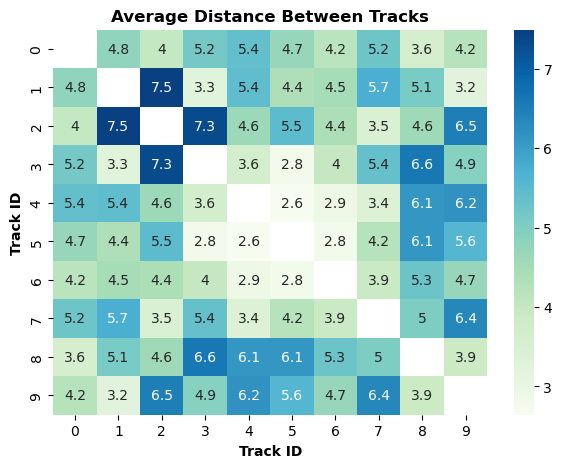

In [54]:
calculate_and_plot_heatmap('/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV/agarose-day4-n10/v025.2023-11-06_day4_n=10_13x.analysis.csv')

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_26449/1942895018.py:28: RuntimeWarning: Mean of empty slice
  mean_distance_matrix = np.nanmean(distance_matrices, axis=0)


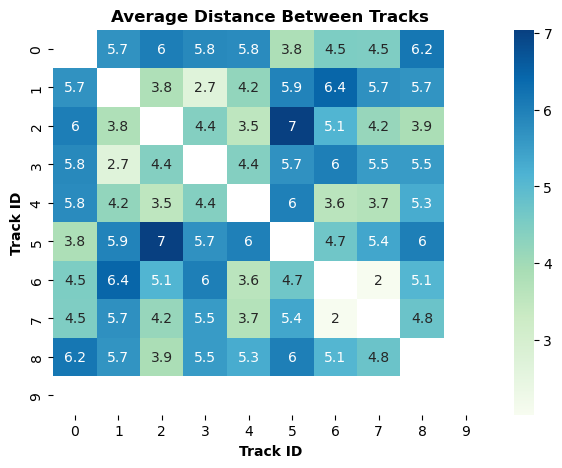

In [56]:
calculate_and_plot_heatmap('/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV/agarose-day4-n10/v025.2023-10-23_day4_n=10_A3.analysis.csv')

In [ ]:
# could make a matrix of all of the different ones - like subplots of all of them 